# Distributed DDE_Period two solution

In [138]:
using DifferentialEquations
using QuadGK
using Plots
gr()

Plots.GRBackend()

### Examples of Nonlinear Functions are
### f(x)= sin (x), f(x)= arctan(x), f(x)=x*(1-x^2), f(x)=1/2(e^x-e^(-x))

In [139]:

const r = 10.0
const tau = 1.0

# Define the nonlinear function
###
function f(x)
   sin(x)
end

###
# STEP Function
###

function f(x)
    if x>0 
        1/2
    elseif x<0
        -1/2
    else
        0
end
end
###


function f(x)
    sin(x)
end



function f(x)
   atan(x)
end

function f(x)
    sin(x^2)
end

function f(x)
   x*(1-x^2)
end

function f(x)
    exp(x)-1
end

function f(x)
    sin(x)+sin(x^2)
end

f (generic function with 1 method)

### Define the problem DDE 

In [140]:
function distdde(du,u,h,p,t)
  du[1] = u[2]
  du[2] = -r*(f(u[1])-f(h(p, t-tau)[1]))
end

lags = [tau]

1-element Array{Float64,1}:
 1.0

### Initial function for x(t) and y(t)

In [141]:
# Initial function for x component
init_x(x)=sin(x)

# Initial function for y component
finit(x)=-f(init_x(x))

init_y(x) = r*quadgk(finit,-1,x)[1]

init_y (generic function with 1 method)

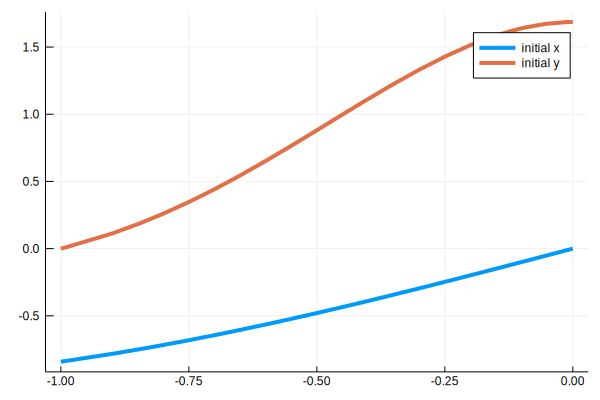

In [142]:
plot(init_x,-1,0,label="initial x",    linewidth=4)
plot!(init_y,-1,0,label="initial y",linewidth=4)

In [143]:
h(p, t) = [init_x(t),init_y(t)]
u0 = [init_x(0),init_y(0)]

2-element Array{Float64,1}:
 0.0               
 1.6864362795828973

In [144]:
tspan = (0.0,100.0)
prob = DDEProblem(distdde,u0,h,tspan; constant_lags=lags)

DDEProblem with uType Array{Float64,1} and tType Float64. In-place: true
timespan: (0.0, 100.0)
u0: [0.0, 1.68644]

In [145]:
alg = MethodOfSteps(Tsit5())

MethodOfSteps{Tsit5,NLFunctional{Rational{Int64},Rational{Int64}},false}(Tsit5(), NLFunctional{Rational{Int64},Rational{Int64}}(1//100, 1//5, 10))

In [146]:
sol = solve(prob,alg,reltol=1e-6);

### Plot x(t)

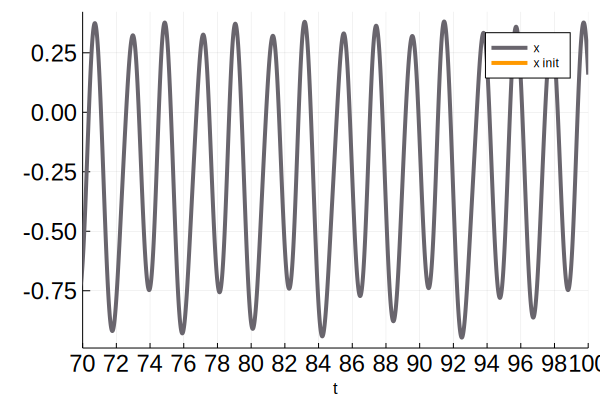

In [147]:

theme(:default)
plot(sol,
    vars=(0,1),
    linewidth=4,
    color="#6a656d",
    label="x",
    xtickfont = font(16),
    xticks = 0:2:200,
    ytickfont = font(16)) # legend=false

plot!(xlims=(70,100))
plot!(init_x,-1,0,
    linewidth=4,
    color="#FF9900",label="x init")

In [148]:
savefig("sindist.pdf")

### Plot y(t)

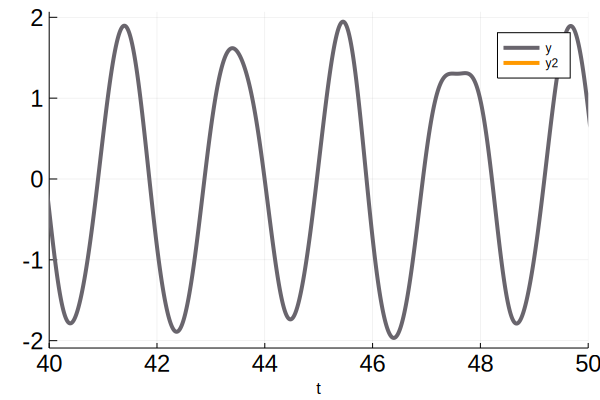

In [149]:
plot(sol,
    vars=(0,2),
    linewidth=4,
    color="#6a656d",
    label="y",
    xtickfont = font(16),
        xticks = 0:2:200,
    ytickfont = font(16)) # legend=false

plot!(xlims=(40,50))
plot!(init_y,-1,0,
    linewidth=4,
    color="#FF9900")

### Plot x(t) and y(t) in the x,y plane

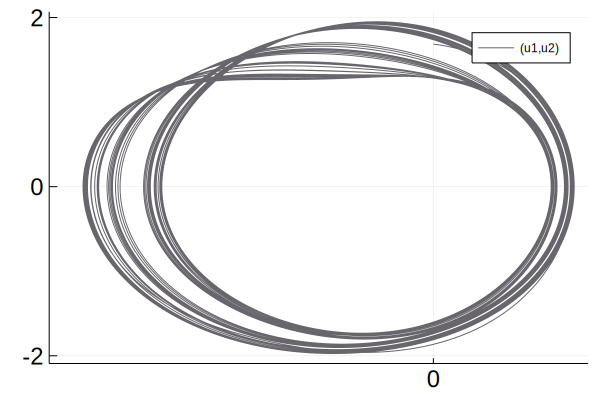

In [150]:
plot(sol,
    vars=(1,2),
    linewidth=1,
    color="#6a656d",
    xtickfont = font(16),
            xticks = -10:2:10,
    ytickfont = font(16),
                yticks = -10:2:10) 